# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [1]:
# !pip install statsmodels

In [2]:
# exercise 1.1
import matplotlib.pyplot as plt 
import numpy as np 

from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices


import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import seaborn as sns 

import statsmodels.api as sm



from sklearn.linear_model import LinearRegression




sns.set()

In [3]:
df = pd.read_csv('../data/housing.csv')

df = df.dropna() 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
#df['CRIM'] = df['CRIM'].convert_dtypes(convert_string=True)
not_to_convert_list = ['CHAS', 'PRICE']
for col in df:
    if col in not_to_convert_list:
        continue
    else:
        df[col] = df[col].astype(np.float64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
# Getting the dependant and response variables
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['PRICE']


In [8]:
#Preparation of values to be used for plotting
min_CRIM = x['CRIM'].min()
mean_CRIM = x['CRIM'].mean()
max_CRIM = x['CRIM'].max()
mean_ZN = x['ZN'].mean() 
mean_INDUS = x['INDUS'].mean()
mean_CHAS = x['CHAS'].mean()
mean_NOX = x['NOX'].mean()
mean_RM = x['RM'].mean()

min_AGE = x['AGE'].min()
mean_AGE = x['AGE'].mean()
max_AGE = x['AGE'].max()


mean_DIS = x['DIS'].mean()
mean_RAD = x['RAD'].mean()
mean_TAX = x['TAX'].mean()
mean_PTRATIO = x['PTRATIO'].mean()
mean_LSTAT = x['LSTAT'].mean()

In [9]:
X = sm.add_constant(x) # y = b + ax [beta_0 beta_1]
model = sm.OLS(y, X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          2.23e-133
Time:                        09:56:55   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
PTRATIO       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
LSTAT         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y1_predictions = model.predict(X)

The R-Squared = 0.734
meaning the model is not over fitting

### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

# AIC , BIC Definitions:

https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/akaike-information-criterion

A good model is the one that has minimum AIC among all the other models. The AIC can be used to select between the additive and multiplicative Holt-Winters models.
Bayesian information criterion (BIC) (Stone, 1979) is another criteria for model selection that measures the trade-off between model fit and complexity of the model. A lower AIC or BIC value indicates a better fit.
The following equations are used to estimate the AIC and BIC (Stone, 1979; Akaike, 1974) of a model:

AIC= -2 * ln(L) + 2*k  (32.18)

BIC= -2 * ln(L) + 2 * ln(N) * k (32.19)

where:

L is the value of the likelihood, 

N is the number of recorded measurements

k is the number of estimated parameters.

>>> There is no value for AIC that can be considered “good” or “bad” because we simply use AIC as a way to compare regression models. The model with the lowest AIC offers the best fit.

In [12]:
#EVALUATION for a 2nd Degree polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
xp.shape

(506, 91)

In [13]:
column_names = polynomial_features.get_feature_names_out()
df_xp = pd.DataFrame(xp)
df_xp.columns = column_names

df_xp

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,RAD^2,RAD TAX,RAD PTRATIO,RAD LSTAT,TAX^2,TAX PTRATIO,TAX LSTAT,PTRATIO^2,PTRATIO LSTAT,LSTAT^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,1.0,296.0,15.3,4.98,87616.0,4528.8,1474.08,234.09,76.194,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,4.0,484.0,35.6,18.28,58564.0,4307.6,2211.88,316.84,162.692,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,4.0,484.0,35.6,8.06,58564.0,4307.6,975.26,316.84,71.734,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,9.0,666.0,56.1,8.82,49284.0,4151.4,652.68,349.69,54.978,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,9.0,666.0,56.1,15.99,49284.0,4151.4,1183.26,349.69,99.671,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,1.0,273.0,21.0,9.67,74529.0,5733.0,2639.91,441.00,203.070,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,1.0,273.0,21.0,9.08,74529.0,5733.0,2478.84,441.00,190.680,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,1.0,273.0,21.0,5.64,74529.0,5733.0,1539.72,441.00,118.440,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,1.0,273.0,21.0,6.48,74529.0,5733.0,1769.04,441.00,136.080,41.9904


In [14]:
model2 = sm.OLS(y, df_xp).fit()
#y2_predictions = model2.predict(xp)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     54.77
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          7.32e-183
Time:                        09:56:55   Log-Likelihood:                -1196.8
No. Observations:                 506   AIC:                             2574.
Df Residuals:                     416   BIC:                             2954.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1              -161.9883     80.632     -2.009      0.045    -320.485      -3.491
CRIM             -5.9779      7.059     -0.847      0.398     -19.854       7.899
ZN                0.3145      0.393      0.801      0.424      -0.458       1.087
INDUS            -4.0845      1.768     -2.310      0.021      -7.559      -0.609
CHAS             34.1509      9.909      3.446      0.001      14.673      53.629
NOX             176.7024    125.273      1.411      0.159     -69.545     422.950
RM               20.1502      7.892      2.553      0.011       4.638      35.663
AGE               0.5921      0.268      2.212      0.027       0.066       1.118
DIS              -5.8499      4.483     -1.305      0.193     -14.661       2.962
RAD               1.7117      2.398      0.714      0.476      -3.002       6.425
TAX              -0.0034      0.115     -0.030      0.976      -0.229       0.223
PTRATIO           7.8798      3.919      2.010      0.045       0.176      15.584
LSTAT             0.2844      0.835      0.341      0.733      -1.356       1.925
CRIM^2            0.0016      0.001      1.310      0.191      -0.001       0.004
CRIM ZN           0.1515      0.198      0.766      0.444      -0.237       0.540
CRIM INDUS        0.4189      0.476      0.880      0.379      -0.517       1.355
CRIM CHAS         2.2430      0.563      3.987      0.000       1.137       3.349
CRIM NOX         -1.5517      0.845     -1.837      0.067      -3.212       0.109
CRIM RM           0.1517      0.056      2.716      0.007       0.042       0.261
CRIM AGE          0.0038      0.003      1.096      0.274      -0.003       0.011
CRIM DIS          0.0661      0.086      0.764      0.445      -0.104       0.236
CRIM RAD          0.3385      0.634      0.534      0.593      -0.907       1.584
CRIM TAX         -0.0302      0.047     -0.648      0.517      -0.122       0.061
CRIM PTRATIO      0.4588      0.334      1.374      0.170      -0.197       1.115
CRIM LSTAT        0.0235      0.006      4.013      0.000       0.012       0.035
ZN^2             -0.0002      0.001     -0.362      0.718      -0.001       0.001
ZN INDUS         -0.0049      0.005     -0.961      0.337      -0.015       0.005
ZN CHAS          -0.0377      0.065     -0.582      0.561      -0.165       0.090
ZN NOX           -0.6779      0.627     -1.082      0.280      -1.909       0.554
ZN RM             0.0098      0.028      0.355      0.723      -0.045       0.064
ZN AGE            0.0002      0.001      0.248      0.805      -0.002       0.002
ZN DIS           -0.0136      0.010     -1.390      0.165      -0.033       0.006
ZN RAD           -0.0056      0.007     -0.783      0.434      -0.019       0.008
ZN TAX            0.0006      0.000      2.937      0.003       0.000       0.001
ZN PTRATIO       -0.0057      0.008     -0.742   

In [15]:
#EVALUATION for a 3rd Degree polynomial regression

polynomial_features= PolynomialFeatures(degree=3)
xp3 = polynomial_features.fit_transform(x)
xp3.shape

(506, 455)

In [16]:
column_names = polynomial_features.get_feature_names_out()
df_xp3 = pd.DataFrame(xp3)
df_xp3.columns = column_names

df_xp3

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,TAX^3,TAX^2 PTRATIO,TAX^2 LSTAT,TAX PTRATIO^2,TAX PTRATIO LSTAT,TAX LSTAT^2,PTRATIO^3,PTRATIO^2 LSTAT,PTRATIO LSTAT^2,LSTAT^3
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,25934336.0,1340524.8,436327.68,69290.64,22553.424,7340.9184,3581.577,1165.7682,379.44612,123.505992
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,14172488.0,1042439.2,535274.96,76675.28,39371.464,20216.5832,5639.752,2895.9176,1487.00488,763.551944
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,14172488.0,1042439.2,236012.92,76675.28,17359.628,3930.2978,5639.752,1276.8652,289.08802,65.450827
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,10941048.0,921610.8,144894.96,77631.18,12205.116,1918.8792,6539.203,1028.0886,161.63532,25.412184
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,10941048.0,921610.8,262683.72,77631.18,22126.962,6306.7758,6539.203,1863.8477,531.24643,151.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,20346417.0,1565109.0,720695.43,120393.00,55438.110,25527.9297,9261.000,4264.4700,1963.68690,904.231063
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,20346417.0,1565109.0,676723.32,120393.00,52055.640,22507.8672,9261.000,4004.2800,1731.37440,748.613312
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,20346417.0,1565109.0,420343.56,120393.00,32334.120,8684.0208,9261.000,2487.2400,668.00160,179.406144
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,20346417.0,1565109.0,482947.92,120393.00,37149.840,11463.3792,9261.000,2857.6800,881.79840,272.097792


In [17]:
model3 = sm.OLS(y, df_xp3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     23.79
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.39e-53
Time:                        09:56:55   Log-Likelihood:                -720.64
No. Observations:                 506   AIC:                             2227.
Df Residuals:                     113   BIC:                             3888.
Df Model:                         392                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
1                   -1.461e+04   2.89e+04     -0.506      0.614   -7.18e+04    4.26e+04
CRIM                 5672.2464   5202.973      1.090      0.278   -4635.782     1.6e+04
ZN                   -715.1450    684.385     -1.045      0.298   -2071.035     640.745
INDUS               -8286.5970   6291.681     -1.317      0.190   -2.08e+04    4178.359
CHAS                   -0.3173      1.859     -0.171      0.865      -4.000       3.365
NOX                 -6877.5629   1.75e+04     -0.393      0.695   -4.16e+04    2.78e+04
RM                    892.9696    822.911      1.085      0.280    -737.366    2523.305
AGE                    14.8580     25.656      0.579      0.564     -35.972      65.688
DIS                   887.5784   1201.369      0.739      0.462   -1492.550    3267.707
RAD                  -1.04e+04   3.23e+04     -0.322      0.748   -7.44e+04    5.36e+04
TAX                   527.9721    758.947      0.696      0.488    -975.638    2031.582
PTRATIO               -81.8663   7047.161     -0.012      0.991    -1.4e+04    1.39e+04
LSTAT                 -21.6579    128.811     -0.168      0.867    -276.855     233.539
CRIM^2                -71.0813    116.184     -0.612      0.542    -301.262     159.099
CRIM ZN               127.0134     83.182      1.527      0.130     -37.784     291.811
CRIM INDUS            -54.3447    127.846     -0.425      0.672    -307.630     198.940
CRIM CHAS               0.2525      0.593      0.426      0.671      -0.922       1.427
CRIM NOX             2074.9755   5563.378      0.373      0.710   -8947.079    1.31e+04
CRIM RM               -62.7107     56.199     -1.116      0.267    -174.052      48.631
CRIM AGE               -4.6537      3.442     -1.352      0.179     -11.473       2.166
CRIM DIS             -164.7652     85.616     -1.924      0.057    -334.386       4.855
CRIM RAD             -260.3867    315.458     -0.825      0.411    -885.366     364.592
CRIM TAX                0.6328     10.288      0.062      0.951     -19.750      21.016
CRIM PTRATIO         -473.8063    448.248     -1.057      0.293   -1361.867     414.255
CRIM LSTAT             -6.0595      8.525     -0.711      0.479     -22.948      10.829
ZN^2                    1.3860      1.479      0.937      0.351      -1.544       4.316
ZN INDUS               -0.4517     30.663     -0.015      0.988     -61.200      60.296
ZN CHAS                -0.0405      0.125     -0.323      0.747      -0.289       0.208
ZN NOX               -328.6591    973.655     -0.338      0.736   -2257.644    1600.326
ZN RM                  10.7135      7.761      1.380      0.170      -4.662      26.089
ZN AGE                  0.3856      0.358      1.077      0.284      -0.324       1.095
ZN DIS                  9.7044     15.761      0.616      0.539     -21.520      40.929
ZN 

In [18]:
print('model1 : R-squared:', model.rsquared, ' The model fits normally')
print('model2 : R-squared:', model2.rsquared, ' The model overfits')
print('model3 : R-squared:', model3.rsquared, ' The model overfits')
print('\n')
print('AIC Model1:', model.aic, ' > ', model2.aic, ' AIC model2' )
print('BIC Model1:', model.bic, ' > ', model2.bic, 'BIC Model2')
print('\n')
print('AIC Model2', model2.aic, ' > ', model3.aic, ' AIC model3' )
print('BIC Model2', model2.bic, ' < ', model3.bic, 'BIC Model3')

model1 : R-squared: 0.7343070437613075  The model fits normally
model2 : R-squared: 0.9213737830057599  The model overfits
model3 : R-squared: 0.9880295508523955  The model overfits


AIC Model1: 3035.8206794796506  >  2573.696788164053  AIC model2
BIC Model1: 3090.765656180388  >  2954.085088399925 BIC Model2


AIC Model2 2573.696788164053  >  2227.271127391191  AIC model3
BIC Model2 2954.085088399925  <  3888.300038421165 BIC Model3


In [19]:
#CONCLUSION

# The model2 has the lowest AIC and BIC with R-Squared showing it overfits
# but let's pick this model as it seems to be a good compromise



### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [20]:
# Let's prepare the DF: We want to visualize the impact of 'CHAS' that has Pvalue<0.005
# 1- for a better visualization : No interactions in the input DF.) Most of Interactions Pvalue>0.05
# 2- prepare the CHAS ranges 
# 3- average all the features of the DF
# 4- Incorporate the CHAS, CHAS^2 ranges in the DF

In [21]:
df_ = df_xp.copy() # we are manipulating the exact same df.

In [22]:
# 1- Remove interactions for the DF. 
drop_list = df_.columns.str.contains(' ') 
drop_list

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False])

In [23]:
drop_list_names = df_.columns[drop_list].values
df_ = df_.drop(drop_list_names, axis=1)

pass_df = df_.copy() # pass_df to be use in Ex2
df_

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,INDUS^2,CHAS^2,NOX^2,RM^2,AGE^2,DIS^2,RAD^2,TAX^2,PTRATIO^2,LSTAT^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,5.3361,0.0,0.289444,43.230625,4251.04,16.728100,1.0,87616.0,234.09,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,49.9849,0.0,0.219961,41.229241,6225.21,24.672082,4.0,58564.0,316.84,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,49.9849,0.0,0.219961,51.624225,3733.21,24.672082,4.0,58564.0,316.84,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,4.7524,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,349.69,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,4.7524,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,349.69,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,142.3249,0.0,0.328329,43.467649,4774.81,6.143458,1.0,74529.0,441.00,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,142.3249,0.0,0.328329,37.454400,5882.89,5.232656,1.0,74529.0,441.00,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,142.3249,0.0,0.328329,48.664576,8281.00,4.698056,1.0,74529.0,441.00,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,142.3249,0.0,0.328329,46.158436,7974.49,5.706843,1.0,74529.0,441.00,41.9904


In [24]:
df_.shape

(506, 25)

In [25]:
#2 - Prepare the ranges for CHAS | CHAS^2
chas_min = df_['CHAS'].min()
chas_max = df_['CHAS'].max()

chas_range = np.linspace(chas_min,chas_max,506)
chas_range_2 = chas_range**2


In [26]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          506 non-null    float64
 1   CRIM       506 non-null    float64
 2   ZN         506 non-null    float64
 3   INDUS      506 non-null    float64
 4   CHAS       506 non-null    float64
 5   NOX        506 non-null    float64
 6   RM         506 non-null    float64
 7   AGE        506 non-null    float64
 8   DIS        506 non-null    float64
 9   RAD        506 non-null    float64
 10  TAX        506 non-null    float64
 11  PTRATIO    506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  CRIM^2     506 non-null    float64
 14  ZN^2       506 non-null    float64
 15  INDUS^2    506 non-null    float64
 16  CHAS^2     506 non-null    float64
 17  NOX^2      506 non-null    float64
 18  RM^2       506 non-null    float64
 19  AGE^2      506 non-null    float64
 20  DIS^2     

In [27]:
# 3- Average all the Features 
for col in df_[1:]:
    df_[col] = df_[col].mean()

In [28]:
df_.columns

Index(['1', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'CRIM^2', 'ZN^2', 'INDUS^2', 'CHAS^2',
       'NOX^2', 'RM^2', 'AGE^2', 'DIS^2', 'RAD^2', 'TAX^2', 'PTRATIO^2',
       'LSTAT^2'],
      dtype='object')

In [29]:
df_ = df_.drop('CHAS',axis=1)
df_ = df_.drop('CHAS^2',axis=1)


In [30]:
# 4- Add the CHAS | CHAS^2 columns with updated ranges to the DF:
df_.insert(4,'CHAS',chas_range)
df_.insert(16,'CHAS^2',chas_range_2)

In [31]:
df_

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,INDUS^2,CHAS^2,NOX^2,RM^2,AGE^2,DIS^2,RAD^2,TAX^2,PTRATIO^2,LSTAT^2
0,1.0,3.613524,11.363636,11.136779,0.000000,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.000000,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
1,1.0,3.613524,11.363636,11.136779,0.001980,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.000004,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
2,1.0,3.613524,11.363636,11.136779,0.003960,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.000016,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
3,1.0,3.613524,11.363636,11.136779,0.005941,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.000035,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
4,1.0,3.613524,11.363636,11.136779,0.007921,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.000063,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,3.613524,11.363636,11.136779,0.992079,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.984221,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
502,1.0,3.613524,11.363636,11.136779,0.994059,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.988154,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
503,1.0,3.613524,11.363636,11.136779,0.996040,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.992095,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989
504,1.0,3.613524,11.363636,11.136779,0.998020,0.554695,6.284634,68.574901,3.795043,9.549407,...,170.999269,0.996044,0.321088,39.989325,5493.309545,18.827601,166.857708,195006.197628,345.284447,210.993989


In [32]:
#remodel without the interactions.
model22 = sm.OLS(y, df_).fit()
# Now the Input 
y_pred22 = model22.predict(df_)

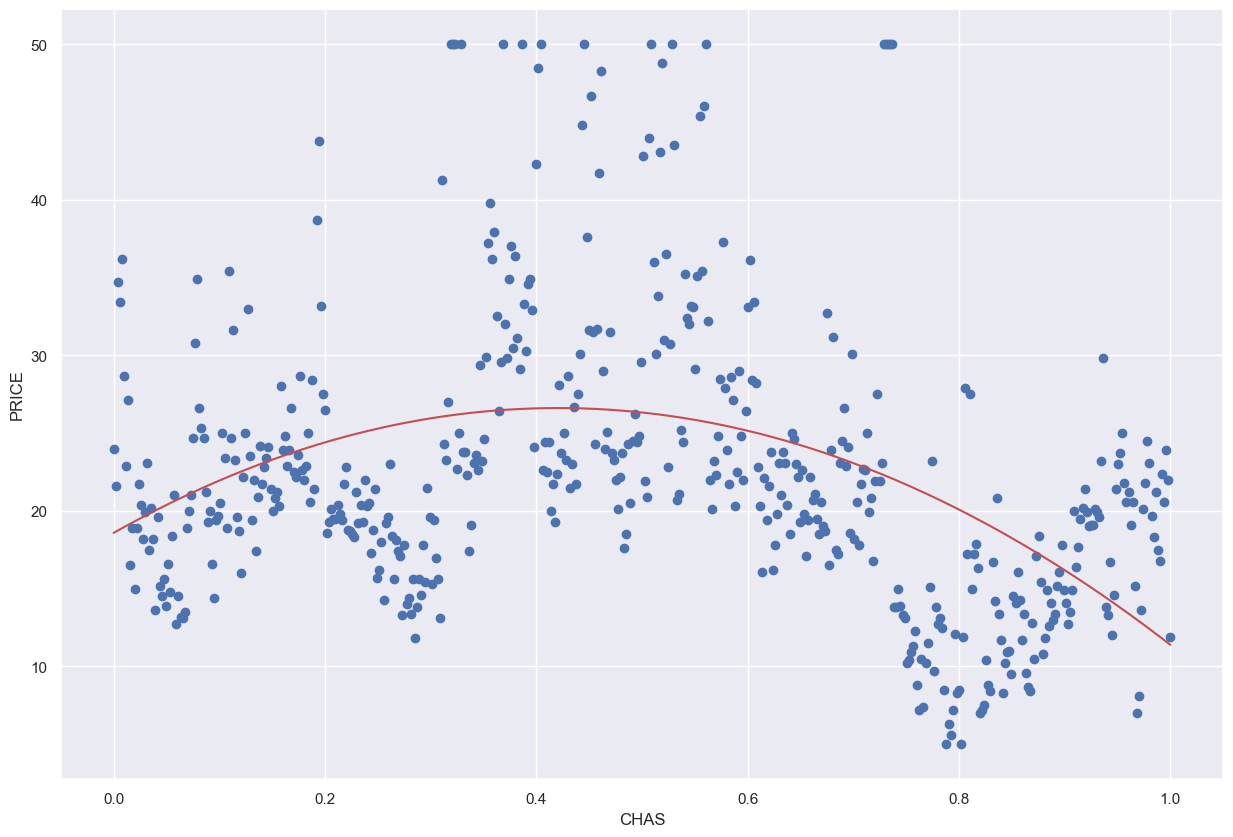

In [33]:
#PLOTTING
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.scatter(df_['CHAS'], y, color='b')
ax1.plot(df_['CHAS'], y_pred22, 'r')
plt.xlabel('CHAS')
plt.ylabel('PRICE')
plt.show()

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [34]:
pass_df

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,INDUS^2,CHAS^2,NOX^2,RM^2,AGE^2,DIS^2,RAD^2,TAX^2,PTRATIO^2,LSTAT^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,5.3361,0.0,0.289444,43.230625,4251.04,16.728100,1.0,87616.0,234.09,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,49.9849,0.0,0.219961,41.229241,6225.21,24.672082,4.0,58564.0,316.84,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,49.9849,0.0,0.219961,51.624225,3733.21,24.672082,4.0,58564.0,316.84,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,4.7524,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,349.69,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,4.7524,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,349.69,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,142.3249,0.0,0.328329,43.467649,4774.81,6.143458,1.0,74529.0,441.00,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,142.3249,0.0,0.328329,37.454400,5882.89,5.232656,1.0,74529.0,441.00,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,142.3249,0.0,0.328329,48.664576,8281.00,4.698056,1.0,74529.0,441.00,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,142.3249,0.0,0.328329,46.158436,7974.49,5.706843,1.0,74529.0,441.00,41.9904


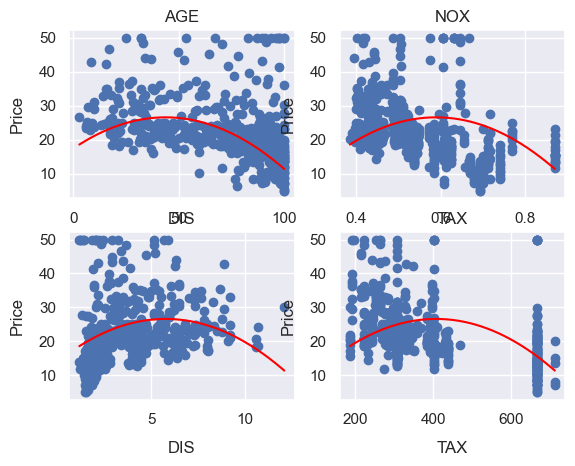

In [47]:
# exercise 2
#The AGE, the NOX, the DIS, the TAX are amoung the greatest factors (based on their P>0.5)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
#y2_predictions = model2.predict(xp)


def df_prep(feature, df):
    min_ft = df[feature].min()
    max_ft = df[feature].max()
    count = len(df[feature])
    rng_ft = np.linspace(min_ft,max_ft,count)
    rng_ft_2 = rng_ft**2

    for col in df[1:]:
        df[col] = df[col].mean()
    #Positions:
    ft_pos = list(df.columns).index(feature)
    ft_pos_2 = list(df.columns).index(feature+'^2')
    
    df = df.drop(feature,axis=1)
    df.insert(ft_pos,feature,rng_ft)
   
    
    df = df.drop(feature+'^2',axis=1)
    df.insert(ft_pos_2,feature+'^2',rng_ft_2)

    
    #also return the specific model
    model_spec = sm.OLS(y, df).fit()
    y_pred_spec = model_spec.predict(df)
    
    return df, y_pred_spec
    


def reg_plot_on_ax(feature, ax):

    
    df, y_pred_spec = df_prep(feature, pass_df.copy())
    
    
    #sns.scatterplot(x=str(feature), y=y, data=df, ax=ax)
    #sns.lineplot(x=df[feature], y=y_pred_spec, color='r', ax=ax)
    
    ax.scatter(pass_df[feature], y, color='b')
    ax.plot(df[feature], y_pred_spec, color='red')
    ax.set_title(feature)
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel('Price', labelpad=10)


list_ft = ['AGE', 'NOX', 'DIS', 'TAX']
axes = [ax1, ax2, ax3, ax4]  
              
for ft, ax in zip(list_ft,axes):
    reg_plot_on_ax(ft, ax)
plt.show()


